In [2]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [3]:
# Importing interim data
interim_data = pd.read_csv('../data/interim/interim.csv')
interim_data.head()

,mileage_per_year,model_year,price,sold,car_age
0,21801,2000,30941.02,yes,24
1,7843,1998,40557.96,yes,26
2,7109,2006,89627.50,no,18
3,26823,2015,95276.14,no,9
4,7935,2014,117384.68,yes,10


In [4]:
# Organizing dataframe columns
interim_data = interim_data[[col for col in interim_data.columns if col not in ['sold']] + ['sold']]
interim_data.head()

,mileage_per_year,model_year,price,car_age,sold
0,21801,2000,30941.02,24,yes
1,7843,1998,40557.96,26,yes
2,7109,2006,89627.50,18,no
3,26823,2015,95276.14,9,no
4,7935,2014,117384.68,10,yes


In [5]:
# Exporting the organized final data for processed file
interim_data.to_csv('../data/processed/processed.csv', index=False)

<h2>Preparing the training and testing data</h2>

In [4]:
# Getting the features and target from the interim dataframe
x = interim_data[[col for col in interim_data.columns if col not in ['model_year','sold']]]
Y = interim_data['sold']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.25)

<h2>Defined a Dummy baseline model</h2>

In [6]:
# Using first a dummy model with the stratify strategy
dummy_model_stratify = DummyClassifier(strategy='stratified')
dummy_model_stratify.fit(x_train,y_train)

dummy_model_stratify_accuracy = (dummy_model_stratify.score(x_train,y_train)*100).round(2)
print(f'Dummy Model (Stratified) Accuracy: {dummy_model_stratify_accuracy} %')

Dummy Model (Stratified) Accuracy: 52.41 %


In [7]:
# Using a dummy model with the most frequent strategy
dummy_model_most_freq = DummyClassifier(strategy='most_frequent')
dummy_model_most_freq.fit(x_train,y_train)

dummy_model_most_freq_accuracy = (dummy_model_most_freq.score(x_train, y_train)*100).round(2)
print(f'Dummy Model (Most Frequent) Accuracy: {dummy_model_most_freq_accuracy} %')

Dummy Model (Most Frequent) Accuracy: 58.11 %


<h2>Linear SVC Model</h2>

In [8]:
# Instantiating the linear SVC model
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

linear_svc_accuracy = (linear_svc.score(x_train, y_train)*100).round(2)
print(f'Linear SVC Model Accuracy: {linear_svc_accuracy} %')

Linear SVC Model Accuracy: 58.11 %


<h2>Decision Tree Model</h2>

In [97]:
# Instantiating the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(x_train, y_train)

decision_tree_model_accuracy = (decision_tree_model.score(x_train, y_train)*100).round(2)
print(f'Decision Tree Model Accuracy: {decision_tree_model_accuracy} %')

Decision Tree Model Accuracy: 78.65 %


In [86]:
accuracy_df_comparative = pd.DataFrame([[dummy_model_stratify_accuracy],[dummy_model_most_freq_accuracy],[linear_svc_accuracy],[decision_tree_model_accuracy]], index = ['Dummy_Stratify', 'Dummy_Most_Freq','LinearSVC','DecisionTreeClassifier'], columns=['Model Accuracy'])
accuracy_df_comparative

,Model Accuracy
Dummy_Stratify,52.41
Dummy_Most_Freq,58.11
LinearSVC,58.11
DecisionTreeClassifier,78.65


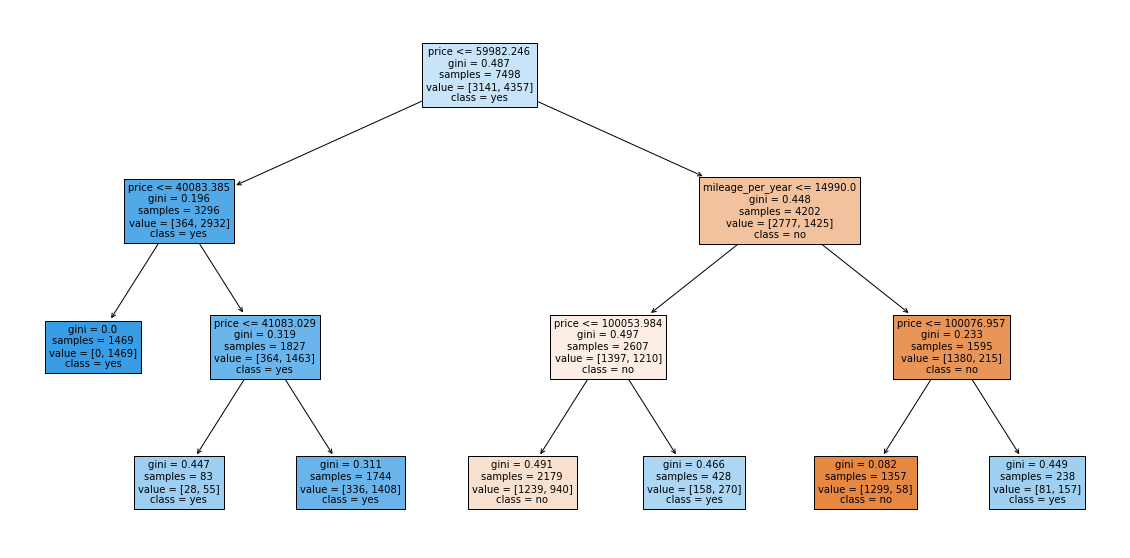

In [47]:
fig = plt.figure(figsize=(20,10))

plot_tree(decision_tree_model, feature_names= x.columns, class_names=['no','yes'], label= 'all', filled= True, fontsize=10)
plt.savefig('../docs/figures/decision_tree_chart.jpeg', format= 'jpeg', dpi= 150)
plt.show()

In [52]:
file_path = os.path.dirname('__file__')
file_path

''

In [54]:
print(os.path.join(file_path,'data','raw_data'))

data/raw_data
